# Sprawozdanie
## Funkcja Sinus

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

dpi_plot = 100

matplotlib.style.use('ggplot')

results = pd.read_csv('../wyniki.csv', delimiter=',')
bb = bw = pd.read_csv('../bledy_bezwzgledne.csv', delimiter=',')
bw = pd.read_csv('../bledy_wzgledne.csv', delimiter=',')

# er_sin_szereg = pd.read_csv('../szereg_od_przodu.csv', delimiter=',')
# er_sin_szereg_rev = pd.read_csv('../szereg_od_tylu.csv', delimiter=',')
# er_sin_term = pd.read_csv('../szereg_term.csv', delimiter=',')

In [2]:
bb_mySin = bb[['x','n','mysin']]
bb_rev = bb[['x','n','mysinrev']]
bb_t = bb[['x','n', 'mysinterms']]
bw_mySin = bw[['x','n','mysin']]
bw_rev = bw[['x','n','mysinrev']]
bw_t = bw[['x','n', 'mysinterms']]

In [3]:
mySin90 = bb_mySin.groupby('n').last()
rev90 = bb_rev.groupby('n').last()
different = bb_rev.groupby('n').last()
term90 = bb_t.groupby('n').last()
different2 = bb_t.groupby('n').last()
different3 = bb_t.groupby('n').last()

In [4]:
different['mysinrev'] = different['mysinrev'].sub(mySin90['mysin'], axis=0)
different2['mysinterms'] = different2['mysinterms'].sub(mySin90['mysin'], axis=0)
different3['mysinterms'] = different3['mysinterms'].sub(rev90['mysinrev'], axis=0)


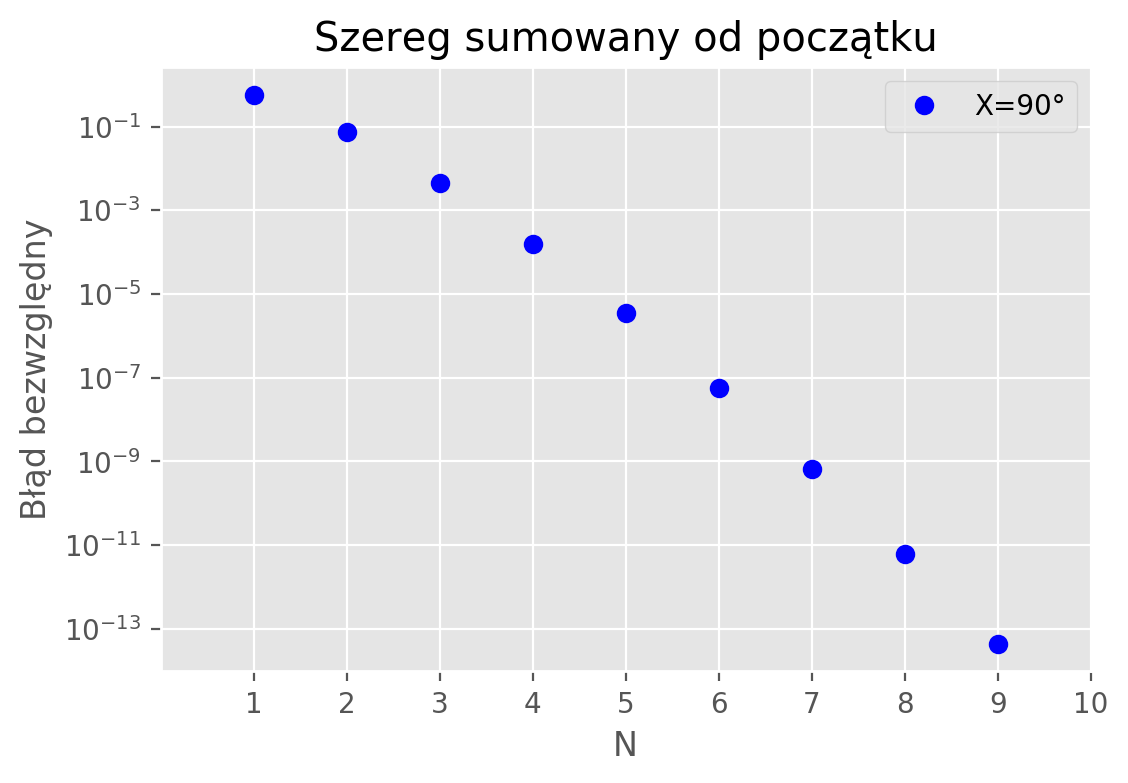

In [5]:
plt.figure(dpi=dpi_plot)
plt.title("Szereg sumowany od początku")
plt.ylabel("Błąd bezwzględny")
plt.xlabel("N")
plt.xlim([0,10])
plt.yscale('log')
plt.xticks(range(1,11))
plt.plot(mySin90[['mysin']], color = 'blue',marker = 'o',linestyle='none',label = "X=90°")
plt.legend()
plt.savefig('sample.pdf')

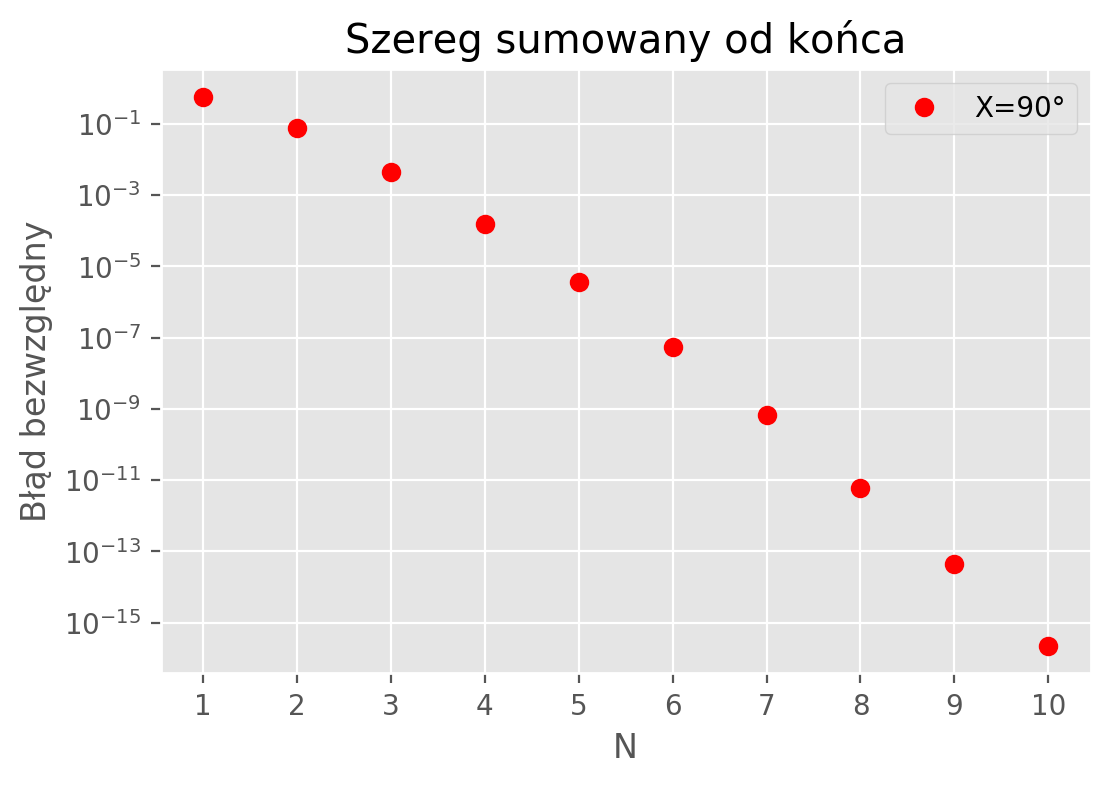

In [6]:
plt.figure(dpi=dpi_plot)
plt.title("Szereg sumowany od końca")
plt.ylabel("Błąd bezwzględny")
plt.xlabel("N")
plt.yscale('log')
plt.plot(rev90[['mysinrev']], color = 'red',marker = 'o',linestyle='none',label = "X=90°")
plt.xticks(range(1,11))
plt.legend()

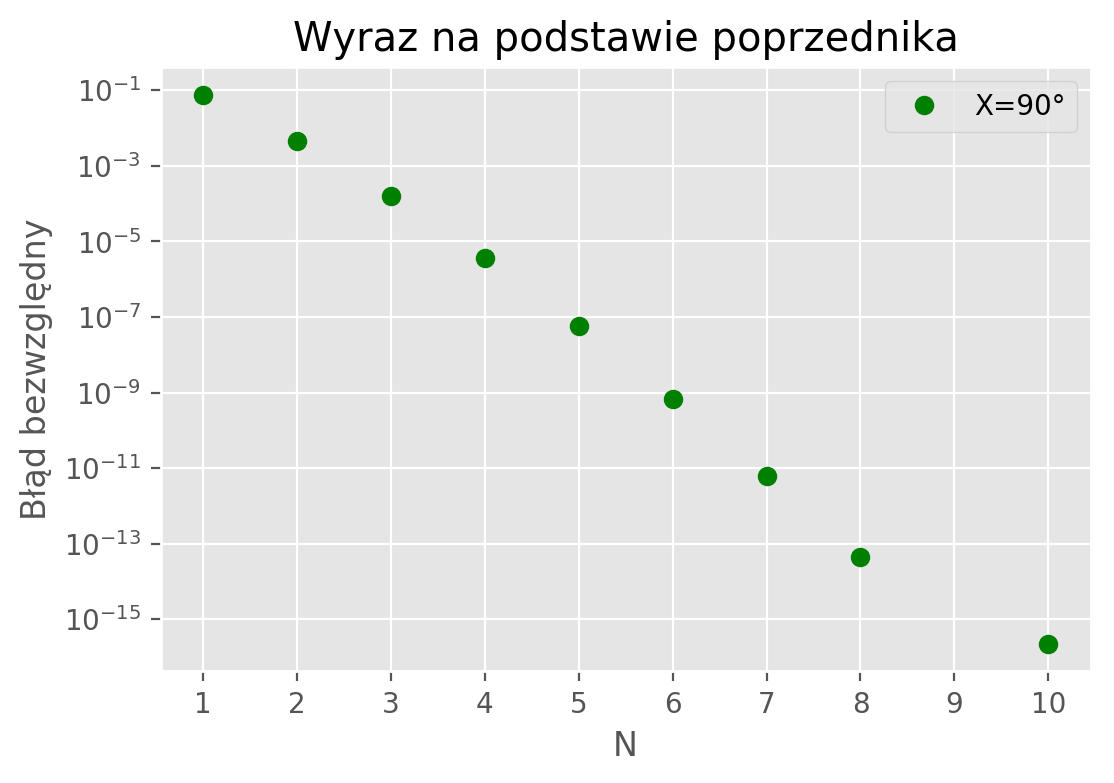

In [7]:
plt.figure(dpi=dpi_plot)
plt.title("Wyraz na podstawie poprzednika")
plt.ylabel("Błąd bezwzględny")
plt.xlabel("N")
plt.yscale('log', nonposy='clip')
plt.plot(term90[['mysinterms']], color = 'green',marker = 'o',linestyle='none',label = "X=90°")
plt.xticks(range(1,11))
plt.legend()

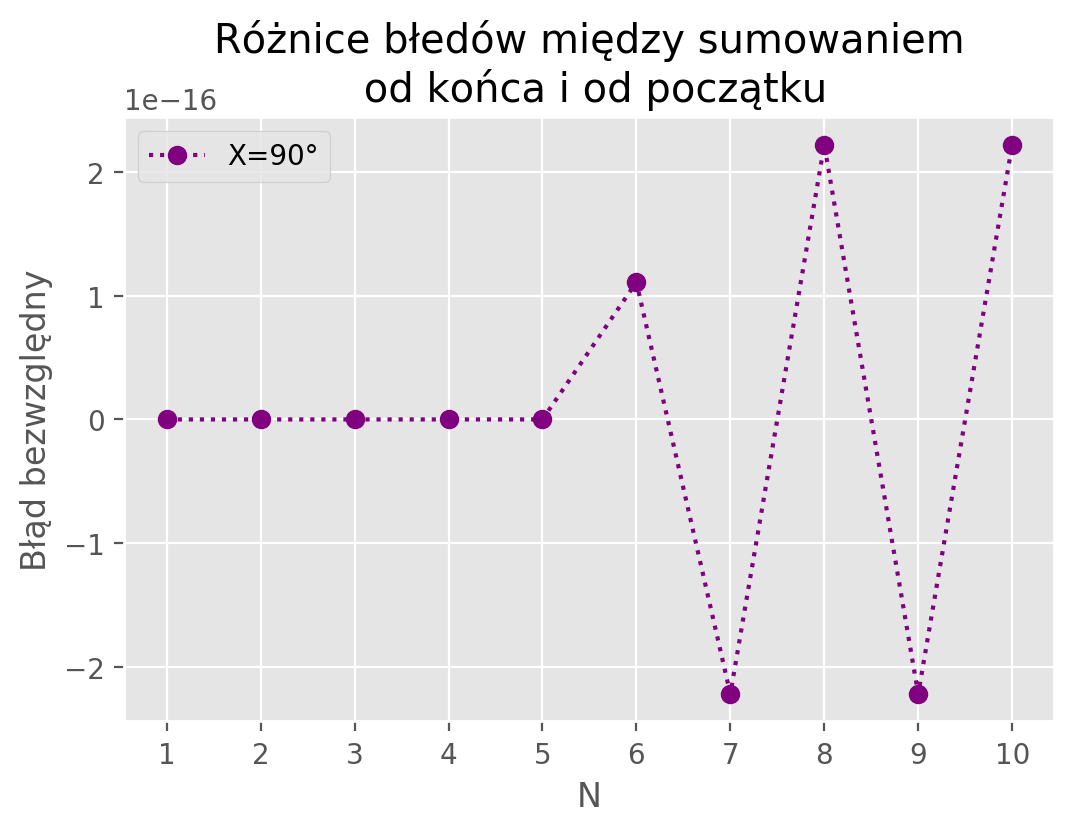

In [8]:
plt.figure(dpi=dpi_plot)
plt.title("Różnice błedów między sumowaniem\n od końca i od początku")
plt.ylabel("Błąd bezwzględny")
plt.xlabel("N")
plt.xticks(range(1,11))
# plt.yscale('log', nonposy='clip')
plt.plot(different[['mysinrev']], color = 'purple',marker = 'o',linestyle=':',label = "X=90°")
plt.legend()

Z wykresu widać, że do `N < 6` błąd jest taki sam, natomiast powyżej dla N parzystych dokładniejsze jest sumowanie od przodu, a dla N nieparzystych sumowanie od końca

In [9]:
different2[['mysinterms']]

,mysinterms
n,
1,-4.956286e-01
2,-7.064292e-02
3,-4.367957e-03
4,-1.533560e-04
5,-3.486325e-06
6,-5.559617e-08
7,-6.567571e-10
8,-5.979439e-12
9,-4.374279e-14


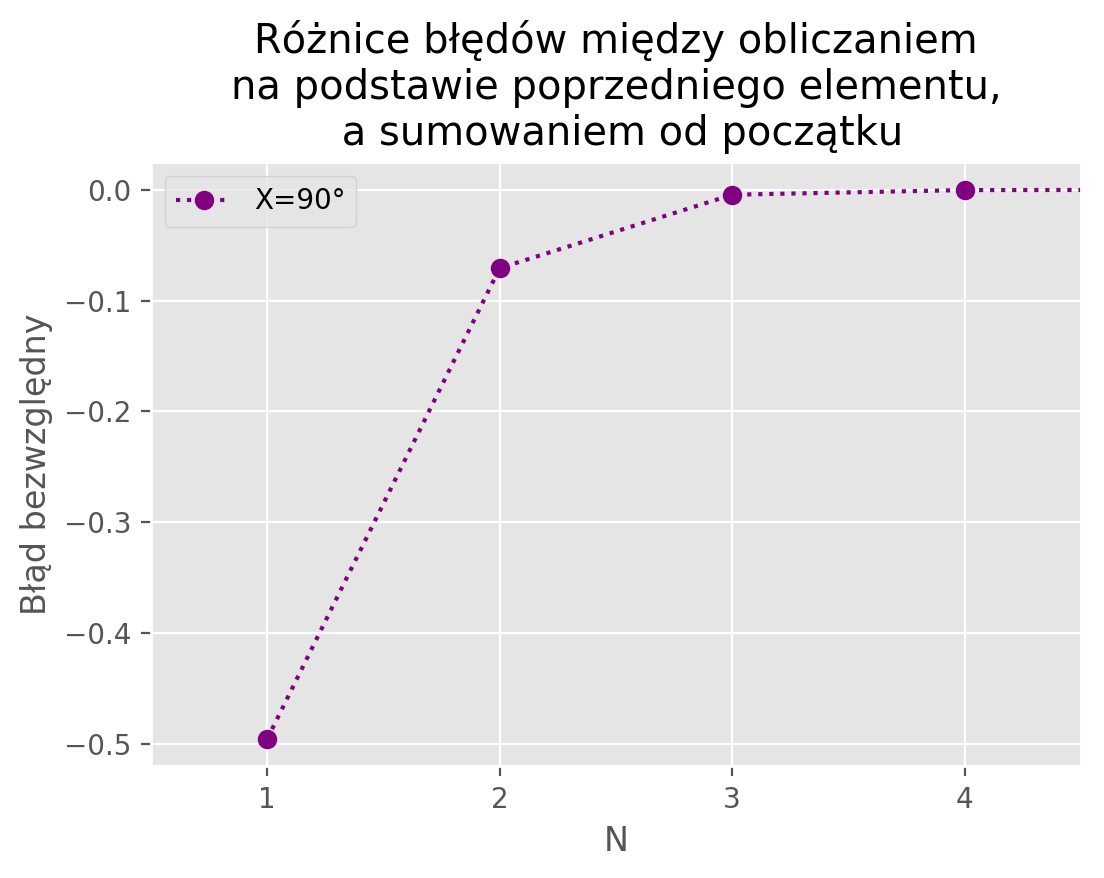

In [10]:
plt.figure(dpi=dpi_plot)
plt.title("Różnice błędów między obliczaniem\nna podstawie poprzedniego elementu,\n a sumowaniem od początku")
plt.ylabel("Błąd bezwzględny")
plt.xlabel("N")
plt.xticks(range(1,11))
plt.xlim(0.5, 4.5)
# plt.yscale('log')
plt.plot(different2[['mysinterms']], color = 'purple',marker = 'o',linestyle=':',label = "X=90°")
plt.legend()

Z wykresu widać, że błąd bezwzględny dla obliczania na podstawie poprzedniego elementu jest mniejszy niż dla sumowania od początku dla `N < 4`, poźniej jest taki sam

## JAK GRUPOWAC

In [11]:
groupSin = bw_mySin.groupby('x')
groupRev = bw_rev.groupby('x')
groupT = bw_t.groupby('x')

In [12]:
groupT.get_group(20)

,x,n,mysinterms
190,20,1,1.259054e-04
191,20,2,3.657081e-07
192,20,3,6.192563e-10
193,20,4,6.863826e-13
194,20,5,3.246100e-16
195,20,6,1.623000e-16
196,20,7,1.623000e-16
197,20,8,1.623000e-16
198,20,9,1.623000e-16
199,20,10,1.623000e-16


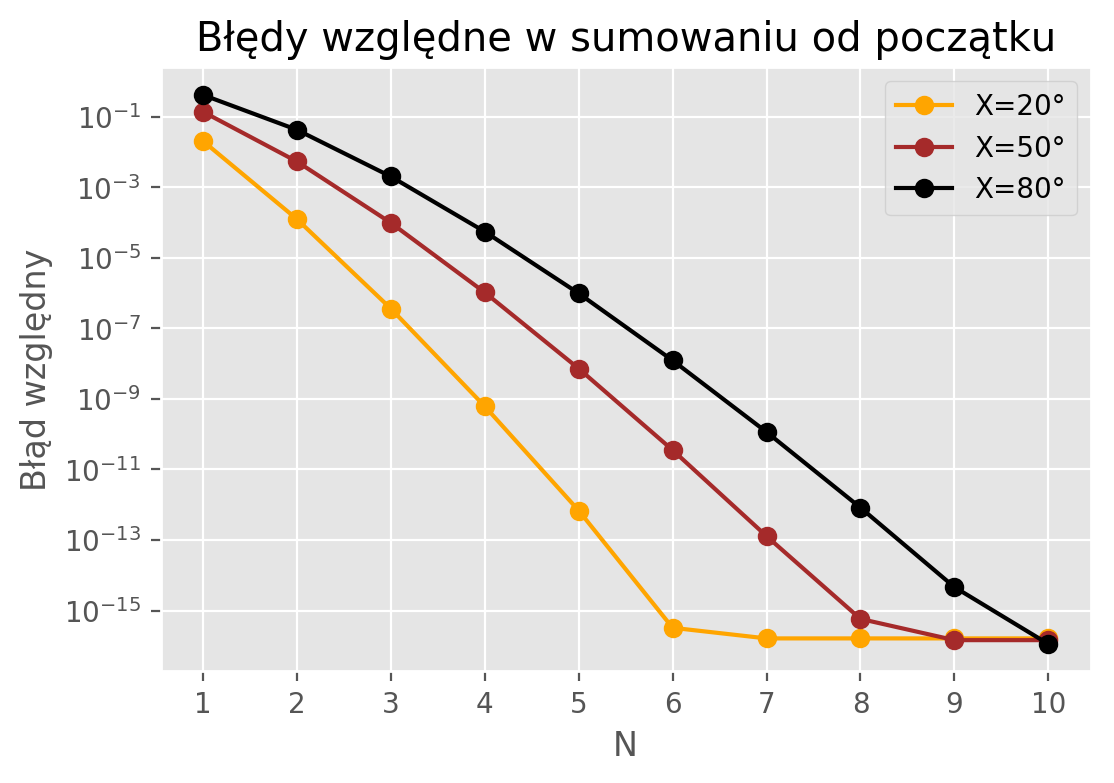

In [13]:
plt.figure(dpi=dpi_plot)
plt.title("Błędy względne w sumowaniu od początku")
plt.ylabel("Błąd względny")
plt.xlabel("N")
plt.yscale('log')
plt.plot(groupSin.get_group(20)[['n']],groupSin.get_group(20)[['mysin']], color = 'orange',marker = 'o',linestyle='-',label = "X=20°")
plt.plot(groupSin.get_group(50)[['n']],groupSin.get_group(50)[['mysin']], color = 'brown',marker = 'o',linestyle='-',label = "X=50°")
plt.plot(groupSin.get_group(80)[['n']],groupSin.get_group(80)[['mysin']], color = 'black',marker = 'o',linestyle='-',label = "X=80°")
plt.xticks(range(1,11))
plt.legend()
plt.savefig('2.pdf')

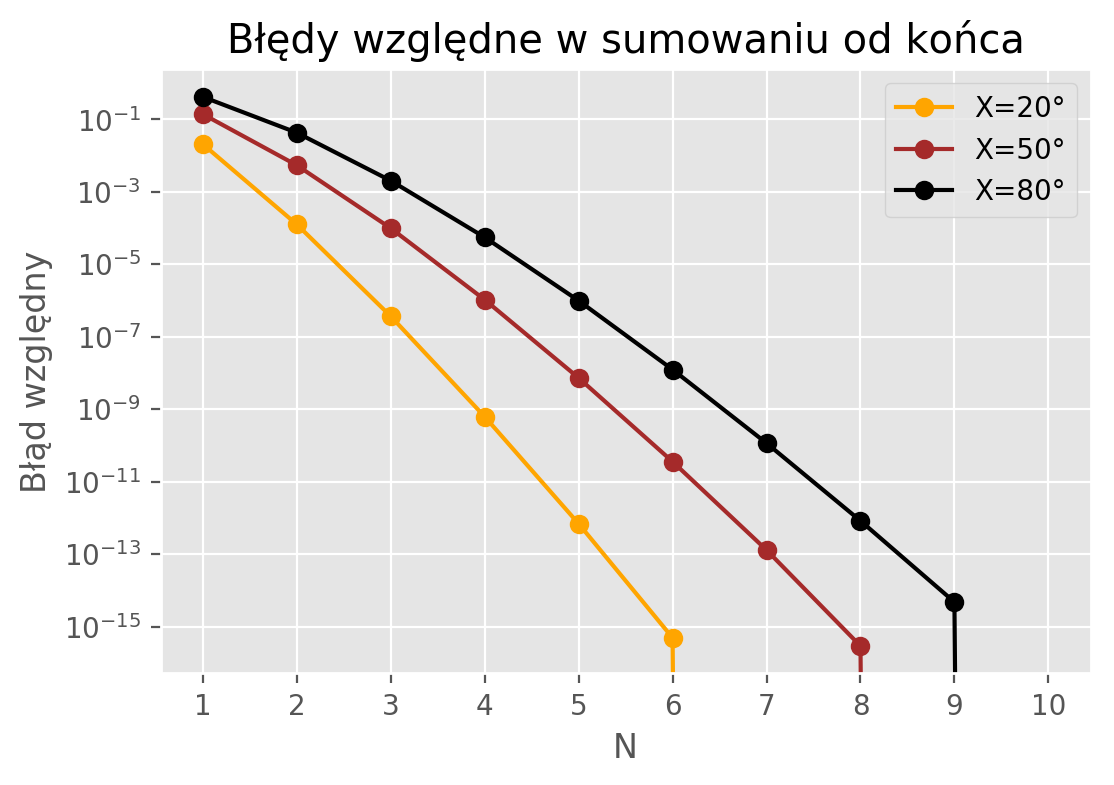

In [14]:
plt.figure(dpi=dpi_plot)
plt.title("Błędy względne w sumowaniu od końca")
plt.ylabel("Błąd względny")
plt.xlabel("N")
plt.yscale('log')
plt.plot(groupRev.get_group(20)[['n']],groupRev.get_group(20)[['mysinrev']], color = 'orange',marker = 'o',linestyle='-',label = "X=20°")
plt.plot(groupRev.get_group(50)[['n']],groupRev.get_group(50)[['mysinrev']], color = 'brown',marker = 'o',linestyle='-',label = "X=50°")
plt.plot(groupRev.get_group(80)[['n']],groupRev.get_group(80)[['mysinrev']], color = 'black',marker = 'o',linestyle='-',label = "X=80°")
plt.xticks(range(1,11))

plt.legend()

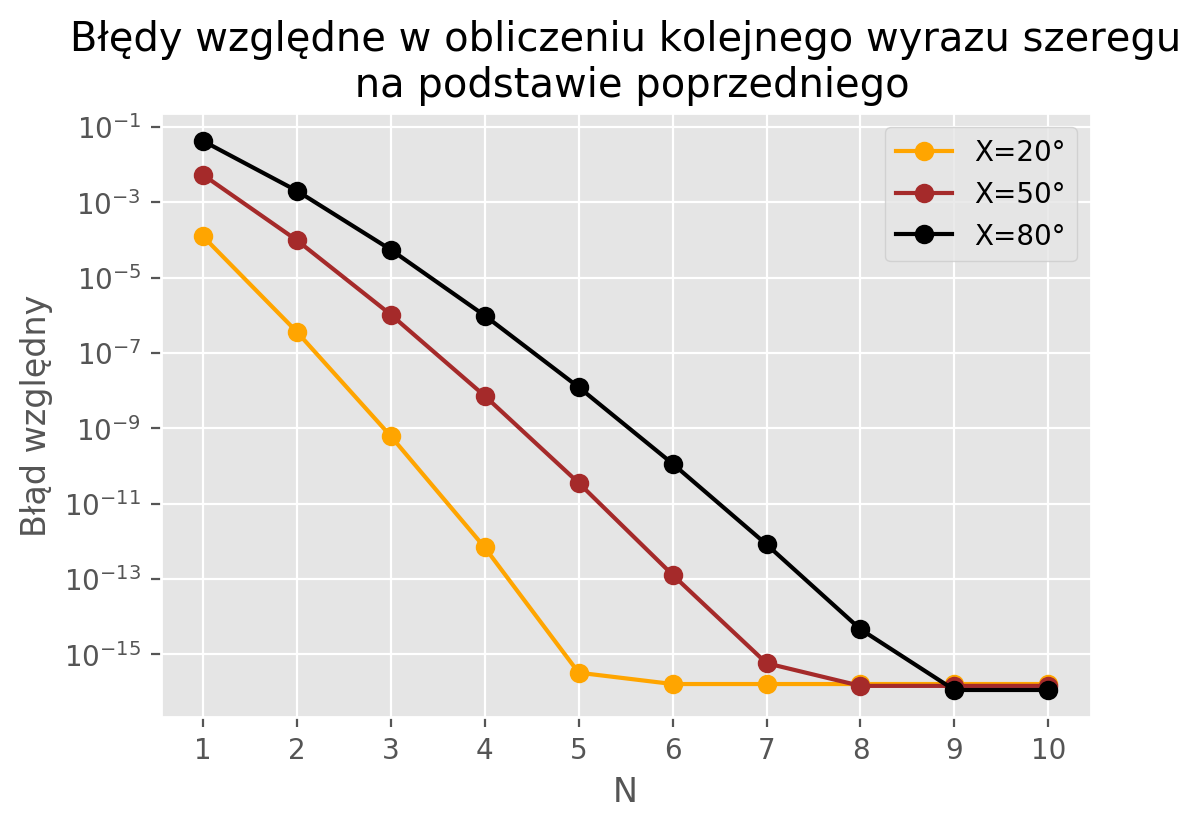

In [15]:
plt.figure(dpi=dpi_plot)
plt.title("Błędy względne w obliczeniu kolejnego wyrazu szeregu\n na podstawie poprzedniego")
plt.ylabel("Błąd względny")
plt.xlabel("N")
plt.yscale('log')
plt.plot(groupT.get_group(20)[['n']],groupT.get_group(20)[['mysinterms']], color = 'orange',marker = 'o',linestyle='-',label = "X=20°")
plt.plot(groupT.get_group(50)[['n']],groupT.get_group(50)[['mysinterms']], color = 'brown',marker = 'o',linestyle='-',label = "X=50°")
plt.plot(groupT.get_group(80)[['n']],groupT.get_group(80)[['mysinterms']], color = 'black',marker = 'o',linestyle='-',label = "X=80°")
plt.xticks(range(1,11))

plt.legend()

In [16]:
bbgroupSin = bb_mySin.groupby('x')
bbgroupRev = bb_rev.groupby('x')
bbgroupT = bb_t.groupby('x')
bbgroupSin.get_group(50)

,x,n,mysin
490,50,1,1.066202e-01
491,50,2,4.141837e-03
492,50,3,7.566849e-05
493,50,4,8.032688e-07
494,50,5,5.572471e-09
495,50,6,2.723732e-11
496,50,7,9.869883e-14
497,50,8,4.440900e-16
498,50,9,1.110200e-16
499,50,10,1.110200e-16


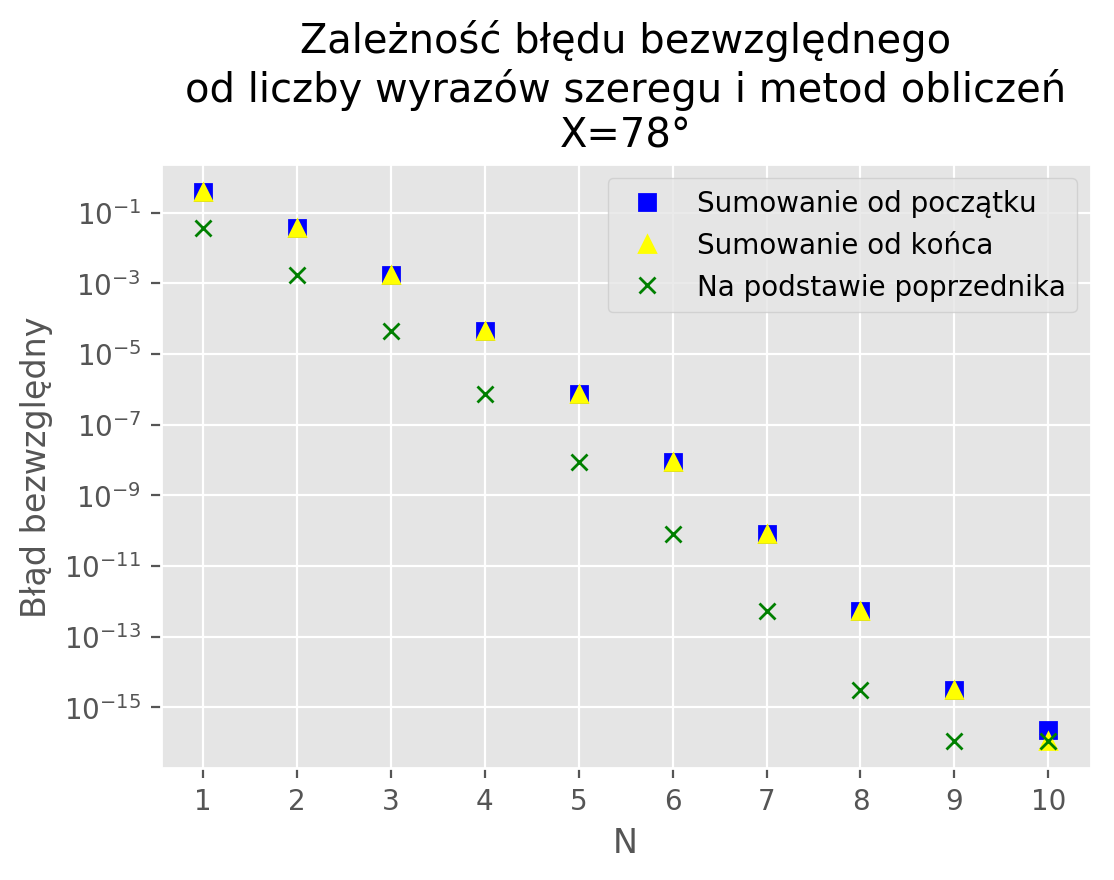

In [18]:
plt.figure(dpi=dpi_plot)
plt.title("Zależność błędu bezwzględnego\nod liczby wyrazów szeregu i metod obliczeń\nX=78°")
plt.ylabel("Błąd bezwzględny")
plt.xlabel("N")
plt.yscale('log')
kat = 78
plt.plot(bbgroupSin.get_group(kat)[['n']],bbgroupSin.get_group(kat)[['mysin']], color = 'blue',marker = 's',linestyle='none',label = "Sumowanie od początku")
plt.plot(bbgroupRev.get_group(kat)[['n']],bbgroupRev.get_group(kat)[['mysinrev']], color = 'yellow',marker = '^',linestyle='none',label = "Sumowanie od końca")
plt.plot(bbgroupT.get_group(kat)[['n']],bbgroupT.get_group(kat)[['mysinterms']], color = 'green',marker = 'x',linestyle='none',label = "Na podstawie poprzednika")
plt.xticks(range(1,11))

plt.legend()